In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [10]:
df= pd.read_csv('TITANIC.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data preprocessing

In [11]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [12]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 418

Number of features: 12

Features:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values: 414

Unique values:
PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [13]:
#datatype inf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [14]:
# check the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# drop the "Cabin" column from the dataframe
df = df.drop(columns='Cabin', axis=1)

In [16]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [17]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#getting some statistical measures about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Data Visualization

In [21]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [22]:
#look at numerical and categrical values separtely
df_num= df[['Age','SibSp','Parch','Fare']]
df_cat= df[['Embarked','Pclass','Survived','Sex']]

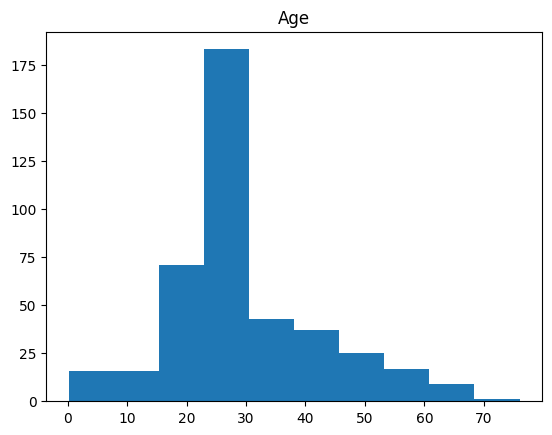

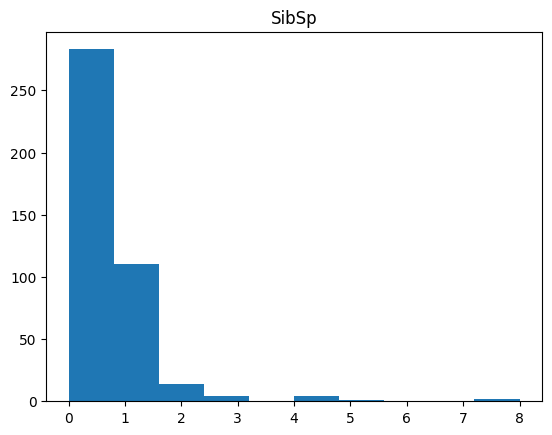

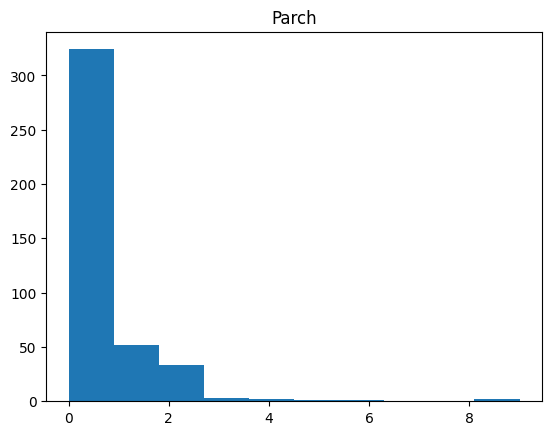

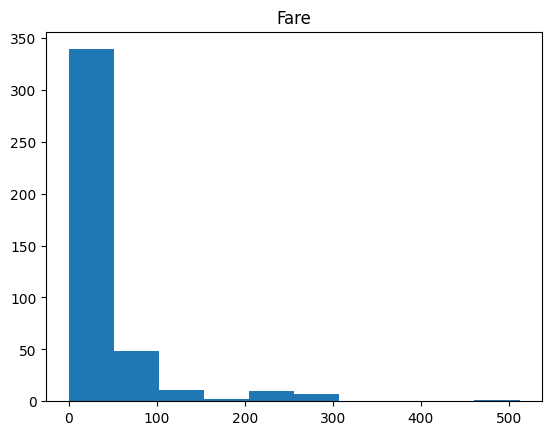

In [23]:
for i in df_num:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.079535 -0.045073  0.326800
SibSp -0.079535  1.000000  0.306895  0.171488
Parch -0.045073  0.306895  1.000000  0.230001
Fare   0.326800  0.171488  0.230001  1.000000


<Axes: >

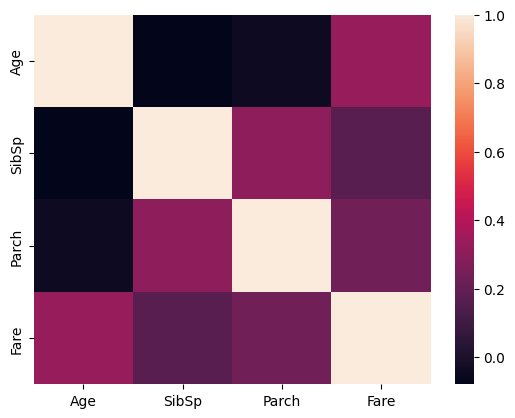

In [24]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [25]:
#compare survival rate with age , sibsp , parch , fare
pd.pivot_table (df, index ='Survived' , values = ['Age','SibSp', 'Parch', 'Fare' ])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272699,27.558326,0.274436,0.379699
1,30.272400,49.747699,0.598684,0.565789


<Axes: xlabel='Survived', ylabel='count'>

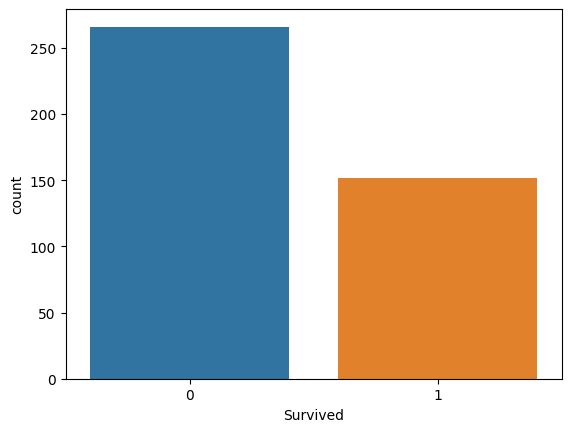

In [26]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=df)

In [27]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

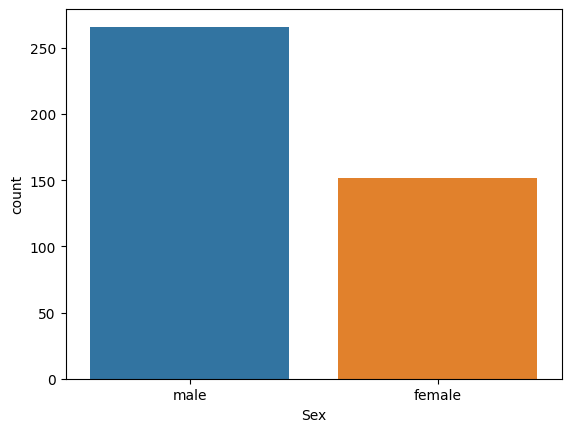

In [28]:
#making a count plot for "Sex" column
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Sex', ylabel='count'>

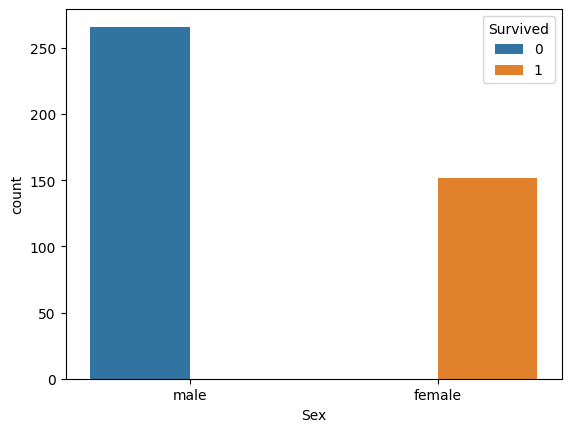

In [29]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

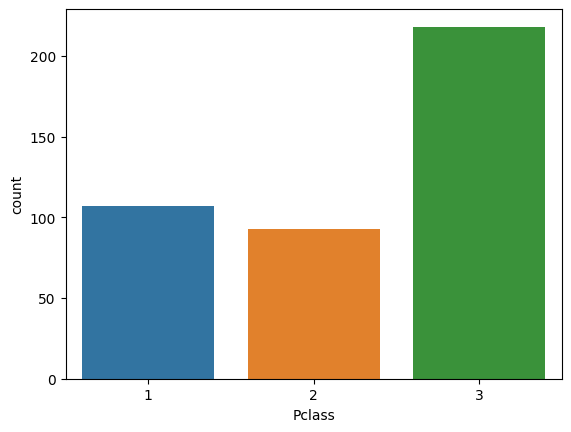

In [30]:
#making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

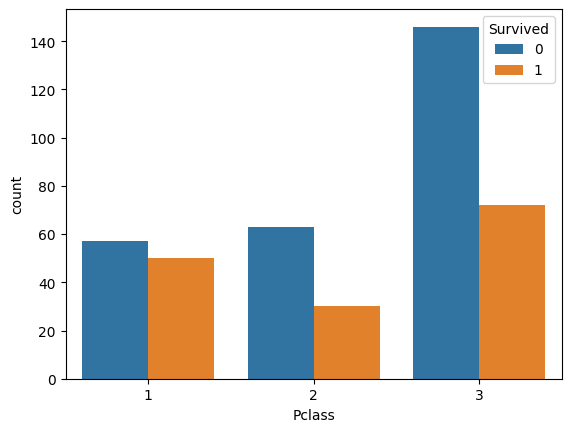

In [31]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

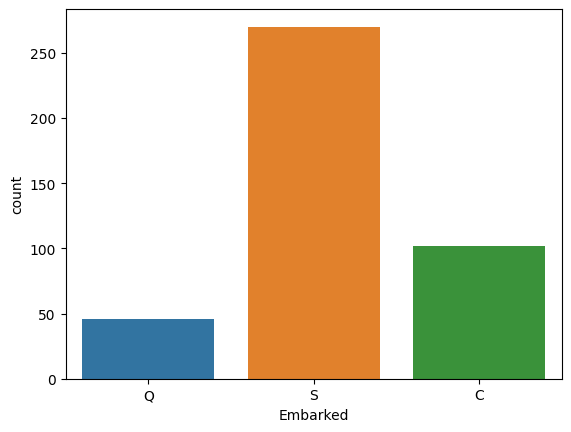

In [32]:
#making a count plot for "Pclass" column
sns.countplot(x='Embarked', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

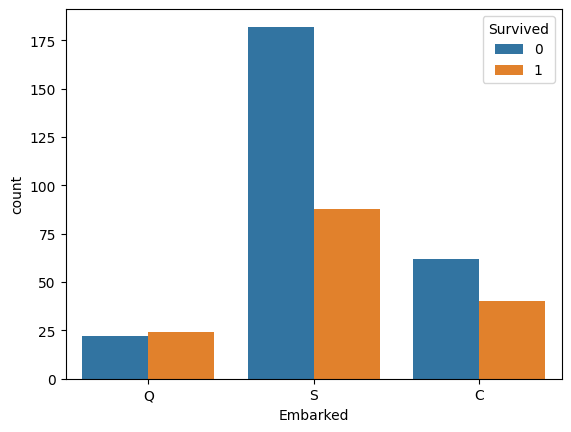

In [33]:
sns.countplot(x='Embarked', hue='Survived', data=df)

In [34]:
pd.pivot_table (df, index ='Survived' ,columns = 'Pclass', values = 'Ticket',aggfunc='count')


Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


In [35]:
pd.pivot_table (df, index ='Survived' ,columns = 'Sex', values = 'Ticket',aggfunc='count')


Sex,female,male
Survived,,
0,NaN,266.0
1,152.0,NaN


In [36]:
pd.pivot_table (df, index ='Survived' ,columns = 'Embarked', values = 'Ticket',aggfunc='count')


Embarked,C,Q,S
Survived,,,
0,62,22,182
1,40,24,88


<ipython-input-37-83a3d3026aa5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='g')
<ipython-input-37-83a3d3026aa5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='b')


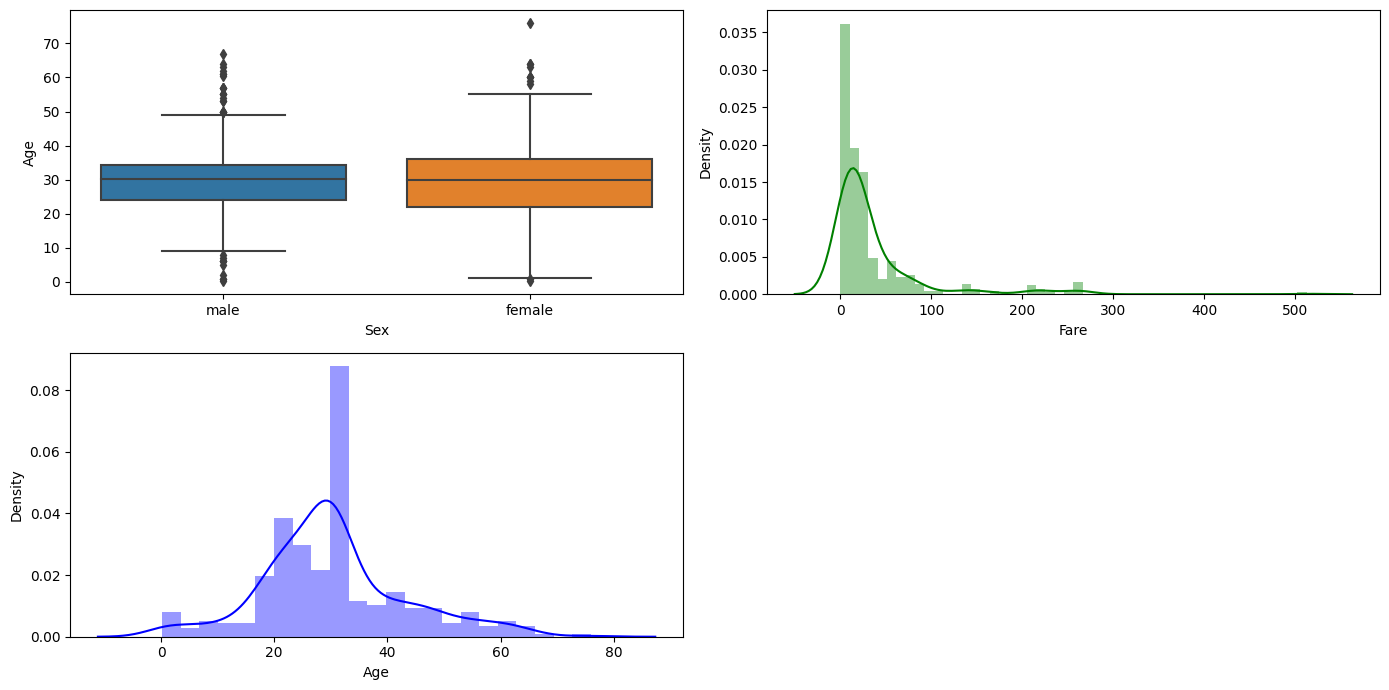

In [37]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='b')


plt.tight_layout()
plt.show()

# correlation

<ipython-input-38-02fb3e1476d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


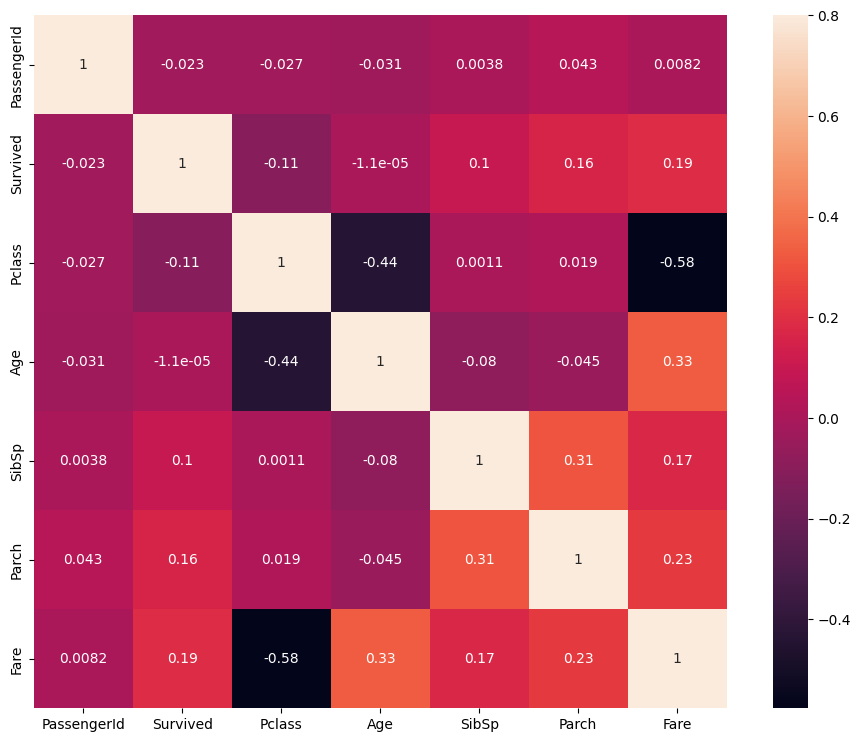

In [38]:
# Heatmap
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

# Encoding the Categorical Columns

In [39]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [40]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [41]:
# converting categorical Columns
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
#df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2


# Separating features & Target

In [43]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [44]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


# Splitting the data into training data & Test data

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building

In [53]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the models
svm_model = SVC()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

# Fit the models
svm_model.fit(X_train_scaled, Y_train)
knn_model.fit(X_train_scaled, Y_train)
logreg_model.fit(X_train_scaled, Y_train)
dt_model.fit(X_train_scaled, Y_train)

# Make predictions
svm_preds = svm_model.predict(X_test_scaled)
knn_preds = knn_model.predict(X_test_scaled)
logreg_preds = logreg_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test_scaled)

# Calculate accuracy scores
svm_accuracy = accuracy_score(Y_test, svm_preds)
knn_accuracy = accuracy_score(Y_test, knn_preds)
logreg_accuracy = accuracy_score(Y_test, logreg_preds)
dt_accuracy = accuracy_score(Y_test, dt_preds)

# Generate classification reports
svm_report = classification_report(Y_test, svm_preds)
knn_report = classification_report(Y_test, knn_preds)
logreg_report = classification_report(Y_test, logreg_preds)
dt_report = classification_report(Y_test, dt_preds)

# Print the results
print("Support Vector Machine:")
print("Accuracy:", svm_accuracy)
print("Classification Report:\n", svm_report)
print("==================================")

print("K-Nearest Neighbors:")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)
print("==================================")

print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Classification Report:\n", logreg_report)
print("==================================")

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_report)
print("==================================")

Support Vector Machine:
Accuracy: 0.9404761904761905
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       1.00      0.85      0.92        33

    accuracy                           0.94        84
   macro avg       0.96      0.92      0.94        84
weighted avg       0.95      0.94      0.94        84

K-Nearest Neighbors:
Accuracy: 0.9761904761904762
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.94      0.97        33

    accuracy                           0.98        84
   macro avg       0.98      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84

Logistic Regression:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00    

In [51]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(X_train_scaled, Y_train)
cv = cross_val_score(LR ,X_train_scaled,Y_train , cv=5 )
print(cv)
print(cv.mean())
y_pred = LR.predict(X_test_scaled)
LRAcc = accuracy_score(Y_pred,Y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

[1. 1. 1. 1. 1.]
1.0
Logistic regression accuracy: 100.00%


In [52]:
rf =RandomForestClassifier(random_state=1)
rf.fit(X_train_scaled, Y_train)
cv = cross_val_score(rf ,X_train_scaled,Y_train , cv=5 )
print(cv)
print(cv.mean())
y_pred = LR.predict(X_test_scaled)
rfAcc = accuracy_score(Y_pred,Y_test)
print('RandomForestClassifier accuracy: {:.2f}%'.format(LRAcc*100))

[1. 1. 1. 1. 1.]
1.0
RandomForestClassifier accuracy: 100.00%
